## Task #4

1. Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule data: bioresponse.csv

2. Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.

3. For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values ​​of the learning rate (at least 5 different learning rates). 

How does it affect the accuracy of the model? 

Compare the accuracy of the models fitted with various BP algorithms.

In [9]:
!pip3 install sklearn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


## 1. Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule data: bioresponse.csv

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
bio = pd.read_csv("bioresponse.csv") 
bio.head(9)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
5,0,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,...,0,0,0,0,0,0,0,0,0,0
6,1,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,...,0,0,0,0,0,0,0,0,0,0
7,1,0.133333,0.610057,0.15,0.00,0.105176,0.759602,0.313393,0.491790,0.756010,...,0,0,1,0,1,0,0,0,0,0
8,1,0.000000,0.776816,0.05,0.00,0.458446,0.738631,0.246347,0.067800,0.751861,...,0,0,0,0,0,0,0,0,0,0


Logistic regression

In [8]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [9]:
print ("sigmoid([0, 2, 10, -10]) = " + str(sigmoid(np.array([0., 2., -2., 100.]))))

sigmoid([0, 2, 10, -10]) = [0.5        0.88079708 0.11920292 1.        ]


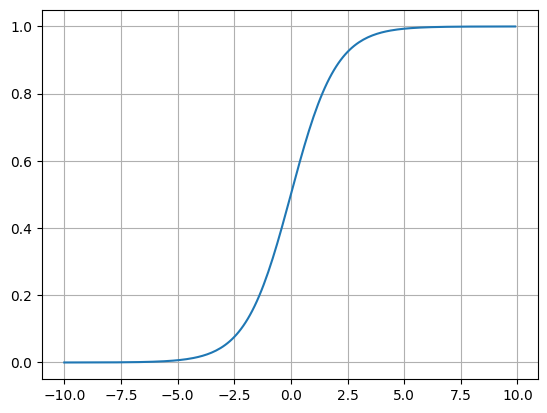

In [10]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, sigmoid(x))
plt.grid()
plt.show()

In [11]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [12]:
dim = 3
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


Propagation

In [13]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [14]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


Optimization

In [15]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [16]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 5000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.002955
Cost after iteration 100: 0.002683
Cost after iteration 200: 0.002461
Cost after iteration 300: 0.002278
Cost after iteration 400: 0.002124
Cost after iteration 500: 0.001991
Cost after iteration 600: 0.001877
Cost after iteration 700: 0.001777
Cost after iteration 800: 0.001689
Cost after iteration 900: 0.001611
Cost after iteration 1000: 0.001541
Cost after iteration 1100: 0.001478
Cost after iteration 1200: 0.001421
Cost after iteration 1300: 0.001369
Cost after iteration 1400: 0.001321
Cost after iteration 1500: 0.001278
Cost after iteration 1600: 0.001238
Cost after iteration 1700: 0.001200
Cost after iteration 1800: 0.001166
Cost after iteration 1900: 0.001134
Cost after iteration 2000: 0.001104
Cost after iteration 2100: 0.001076
Cost after iteration 2200: 0.001050
Cost after iteration 2300: 0.001025
Cost after iteration 2400: 0.001002
Cost after iteration 2500: 0.000980
Cost after iteration 2600: 0.000959
Cost after iteration 2700: 0.000940
Cost

Implement prediction

In [17]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [18]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


Merge it all into a model

In [19]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [20]:
X = bio.drop('Activity', axis=1)
y = bio['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test = X_train.values.T, X_test.values.T, y_train.values.reshape(1, -1), y_test.values.reshape(1, -1)

In [21]:
model = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.681095
Cost after iteration 200: 0.673994
Cost after iteration 300: 0.667662
Cost after iteration 400: 0.661794
Cost after iteration 500: 0.656314
Cost after iteration 600: 0.651172
Cost after iteration 700: 0.646329
Cost after iteration 800: 0.641754
Cost after iteration 900: 0.637419
Cost after iteration 1000: 0.633303
Cost after iteration 1100: 0.629386
Cost after iteration 1200: 0.625651
Cost after iteration 1300: 0.622084
Cost after iteration 1400: 0.618672
Cost after iteration 1500: 0.615404
Cost after iteration 1600: 0.612268
Cost after iteration 1700: 0.609257
Cost after iteration 1800: 0.606360
Cost after iteration 1900: 0.603572
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %


2. Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.

In [22]:
import numpy as np

def optimize_new(w, b, X, Y, num_iterations, learning_rate, print_cost=False, optimizer='gd', adam_params={"beta1": 0.9, "beta2": 0.999, "epsilon": 1e-8}):

    # Initialize variables for tracking costs and Adam optimizer
    costs = []
    s_dw = np.zeros((X.shape[0], 1))
    s_db = 0
    t = 0

    # Loop over the number of iterations
    for i in range(num_iterations):

        # If optimizer is stochastic gradient descent, create a mini-batch with a single random example
        if optimizer == 'sgd':
            random_index = np.random.randint(X.shape[1])
            X_mini = X[:, random_index].reshape(-1, 1)
            Y_mini = Y[:, random_index]
        else:
            # For other optimizers, use the full dataset
            X_mini, Y_mini = X, Y

        # Calculate gradients and cost using propagate function
        grads, cost = propagate(w, b, X_mini, Y_mini)
        dw = grads["dw"]
        db = grads["db"]

        # Update rule for gradient descent and stochastic gradient descent
        if optimizer == 'gd' or optimizer == 'sgd':
            w -= learning_rate * dw
            b -= learning_rate * db
        # Update rule for Adam optimizer
        elif optimizer == 'adam':
            t += 1
            dw_corrected, db_corrected = dw / (1 - adam_params["beta1"] ** t), db / (1 - adam_params["beta1"] ** t)
            s_dw, s_db = adam_params["beta2"] * s_dw + (1 - adam_params["beta2"]) * (dw**2), adam_params["beta2"] * s_db + (1 - adam_params["beta2"]) * (db**2)
            w -= learning_rate * dw_corrected / (np.sqrt(s_dw) + adam_params["epsilon"])
            b -= learning_rate * db_corrected / (np.sqrt(s_db) + adam_params["epsilon"])
        else:
            # Raise an error if an unknown optimizer is specified
            raise ValueError('Unknown optimizer')

        # Record the cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
            # Print the cost every 100 training iterations if print_cost is True
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")

    # Store the updated parameters and gradients
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs


In [23]:
def model_new(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False, optimizer='gd', adam_params={"beta1": 0.9, "beta2": 0.999, "epsilon": 1e-8}):
    
    # Initialize the parameters (weights and bias) with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Perform optimization using the specified optimizer, learning rate, and other options
    # This step will update the parameters to minimize the cost function
    parameters, grads, costs = optimize_new(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost, optimizer=optimizer, adam_params=adam_params)
    
    # Retrieve the updated parameters (weights and bias) after optimization
    w = parameters["w"]
    b = parameters["b"]
    
    # Use the learned parameters to make predictions on the train set
    Y_prediction_train = predict(w, b, X_train)
    # Use the learned parameters to make predictions on the test set
    Y_prediction_test = predict(w, b, X_test)

    # Calculate the train accuracy by comparing predictions to the ground truth
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    # Calculate the test accuracy by comparing predictions to the ground truth
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100

    # Print the train and test accuracies
    print(f"train accuracy: {train_accuracy} %")
    print(f"test accuracy: {test_accuracy} %")

    # Return a dictionary containing the results, learned parameters, and other relevant information
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations,
         "test_accuracy": test_accuracy}
    
    return d


GD Model

In [24]:
gd = model_new(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, optimizer='gd')

Cost after iteration 0: [0.69314718]
Cost after iteration 100: [0.68109514]
Cost after iteration 200: [0.67399352]
Cost after iteration 300: [0.6676618]
Cost after iteration 400: [0.66179374]
Cost after iteration 500: [0.65631375]
Cost after iteration 600: [0.65117202]
Cost after iteration 700: [0.64632937]
Cost after iteration 800: [0.64175395]
Cost after iteration 900: [0.63741928]
Cost after iteration 1000: [0.63330298]
Cost after iteration 1100: [0.62938585]
Cost after iteration 1200: [0.6256512]
Cost after iteration 1300: [0.6220844]
Cost after iteration 1400: [0.61867249]
Cost after iteration 1500: [0.61540394]
Cost after iteration 1600: [0.61226843]
Cost after iteration 1700: [0.60925667]
Cost after iteration 1800: [0.60636026]
Cost after iteration 1900: [0.60357161]
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %


SGD Model

In [25]:
sgd = model_new(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, optimizer='sgd')

Cost after iteration 0: [0.69314718]
Cost after iteration 100: [0.96374565]
Cost after iteration 200: [1.17075879]
Cost after iteration 300: [0.6722929]
Cost after iteration 400: [0.6523764]
Cost after iteration 500: [0.6076601]
Cost after iteration 600: [0.68435449]
Cost after iteration 700: [0.60025461]
Cost after iteration 800: [0.4458423]
Cost after iteration 900: [0.70992558]
Cost after iteration 1000: [0.48627389]
Cost after iteration 1100: [0.46783229]
Cost after iteration 1200: [0.6317917]
Cost after iteration 1300: [0.74809722]
Cost after iteration 1400: [1.07327585]
Cost after iteration 1500: [1.34386005]
Cost after iteration 1600: [0.4474469]
Cost after iteration 1700: [0.96566048]
Cost after iteration 1800: [0.90990354]
Cost after iteration 1900: [0.44012994]
train accuracy: 66.44152150728759 %
test accuracy: 63.32622601279317 %


Adam Model

In [26]:
adam = model_new(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, optimizer='adam')

Cost after iteration 0: [0.69314718]
Cost after iteration 100: [0.43052692]
Cost after iteration 200: [0.38936875]
Cost after iteration 300: [0.36699866]
Cost after iteration 400: [0.35172092]
Cost after iteration 500: [0.34001253]
Cost after iteration 600: [0.3304238]
Cost after iteration 700: [0.32224333]
Cost after iteration 800: [0.31507219]
Cost after iteration 900: [0.30866269]
Cost after iteration 1000: [0.30284917]
Cost after iteration 1100: [0.2975147]
Cost after iteration 1200: [0.2925735]
Cost after iteration 1300: [0.28796072]
Cost after iteration 1400: [0.28362616]
Cost after iteration 1500: [0.27953032]
Cost after iteration 1600: [0.27564159]
Cost after iteration 1700: [0.27193444]
Cost after iteration 1800: [0.26838802]
Cost after iteration 1900: [0.26498519]
train accuracy: 89.47742623533594 %
test accuracy: 75.15991471215352 %


3. For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values ​​of the learning rate (at least 5 different learning rates). 

How does it affect the accuracy of the model? 

Compare the accuracy of the models fitted with various BP algorithms.

train accuracy: 78.35051546391753 %
test accuracy: 75.5863539445629 %
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %
train accuracy: 57.625311055812304 %
test accuracy: 60.66098081023454 %
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
train accuracy: 74.6178457163171 %
test accuracy: 71.32196162046908 %
train accuracy: 71.88055456807679 %
test accuracy: 72.0682302771855 %
train accuracy: 63.52648418059012 %
test accuracy: 65.88486140724947 %
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
train accuracy: 92.67685744756487 %
test accuracy: 72.28144989339019 %
train accuracy: 89.47742623533594 %
test accuracy: 75.15991471215352 %
train accuracy: 83.14966228226093 %
test accuracy: 75.79957356076758 %
train accuracy: 74.15570565232848 %
test accuracy: 72.70788912579957 %
train ac

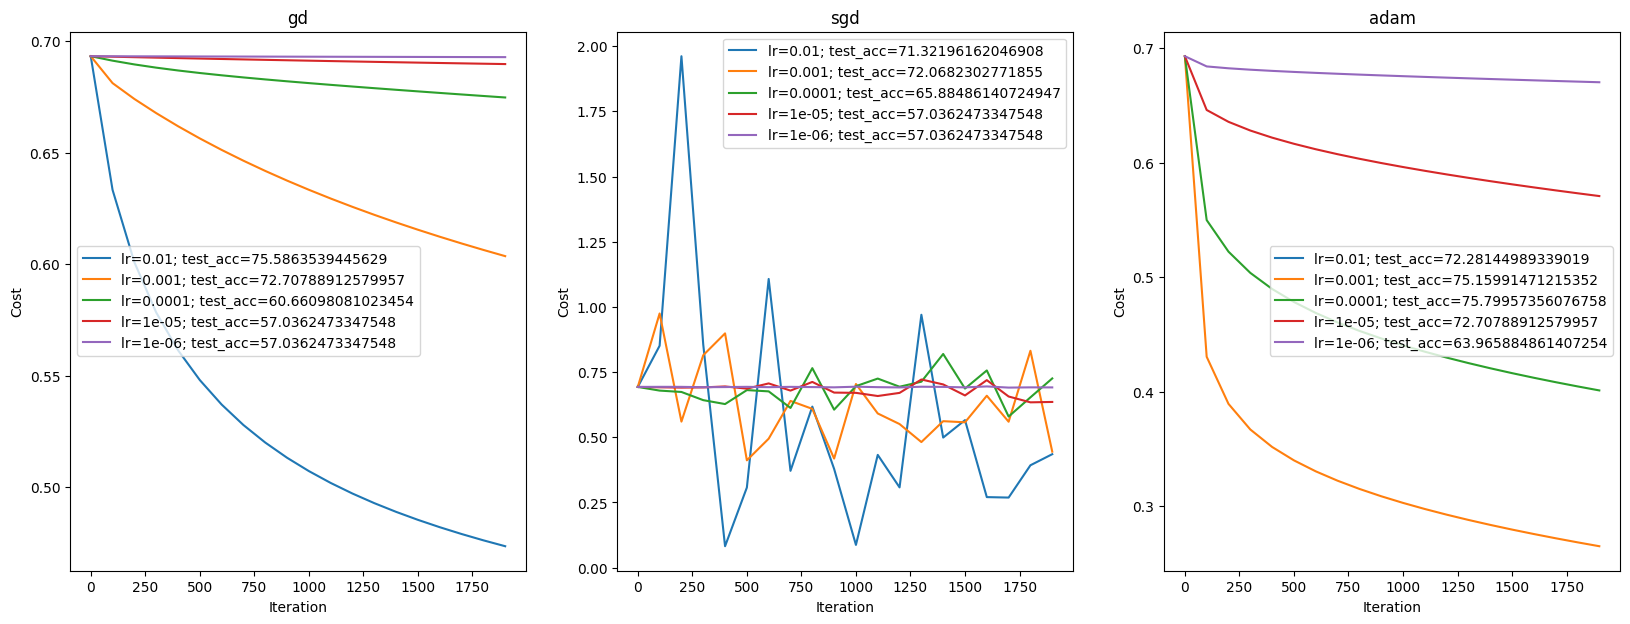

In [27]:
import matplotlib.pyplot as plt

# Define learning rates to try
learning_rates = [0.01, 0.001, 0.0001, 0.00001, 0.000001]

# Create subplots for each optimizer's cost and accuracy
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

# Loop through the optimizers and learning rates, train the model, and plot the costs
for index_opt, optimizer in enumerate(["gd", "sgd", "adam"]):
    ax[index_opt].set_title(optimizer)
    test_accuracies = []

    for index_lr, learning_rate in enumerate(learning_rates):
        # Train the model with the current optimizer and learning rate
        model = model_new(X_train, y_train, X_test, y_test, learning_rate=learning_rate, num_iterations=2000, print_cost=False, optimizer=optimizer)
        
        # Plot the cost for the current optimizer and learning rate
        ax[index_opt].plot(list(map(lambda elem: elem * 100, range(len(model['costs'])))), model['costs'])
        
        # Set x-axis and y-axis labels
        ax[index_opt].set_xlabel("Iteration")
        ax[index_opt].set_ylabel("Cost")
        
        # Store the test accuracy for the current learning rate
        test_accuracies.append(model['test_accuracy'])
    
    # Add a legend with the learning rates and their corresponding test accuracies
    ax[index_opt].legend(list(map(lambda elem: f'lr={elem}; test_acc={test_accuracies[learning_rates.index(elem)]}', learning_rates)))

# Display the plots
plt.show()

## Observation

Based on the provided training results, we can observe the following:

As the learning rate increases, the train and test accuracies generally improve. This indicates that a higher learning rate allows the model to learn more quickly and find better weights and biases for the given problem.

The best test accuracy (75.79957356076758%) is obtained with the Adam optimizer at a learning rate of 0.0001. This suggests that, for this specific dataset and problem, the Adam optimizer performs better than Gradient Descent (GD) and Stochastic Gradient Descent (SGD).

The difference between train and test accuracy seems to be the smallest for the Adam optimizer, especially at a learning rate of 0.0001. This could indicate that the model is generalizing well and not overfitting the training data.

The performance of GD and SGD optimizers is relatively poor compared to the Adam optimizer. This could be due to a less efficient update rule or a less suitable learning rate for the given problem.

Based on these observations, it would be reasonable to conclude that, for this specific dataset and problem, the Adam optimizer with a learning rate of 0.0001 provides the best performance in terms of test accuracy and generalization.